In [2]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import matplotlib.pyplot as plt
from obspy.geodetics.base import gps2dist_azimuth,kilometer2degrees
from obspy.taup import TauPyModel
from obspy.signal.rotate import rotate_ne_rt
from matplotlib.ticker import MultipleLocator
from obspy import read, read_inventory, Stream, Trace
import numpy as np
from obspy.io.sac.sacpz import attach_paz
from obspy.signal.filter import envelope
import pandas as pd
import os,glob
import warnings
warnings.filterwarnings("ignore")
model = TauPyModel(model="prem")
client = Client("IRIS")
plt.rcParams['font.sans-serif']='Times New Roman'

In [3]:
DATA_DIR = '/Volumes/home/Research/DataBase/00_'
PZ_DIR  =  '/Volumes/home/Research/DataBase/00_PZs'
INFO_DIR = '/Volumes/home/Research/DataBase/Armenia'

In [3]:
2014-06-23T22:29:51.830000Z

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (<ipython-input-3-aa2ff4ffa709>, line 1)

In [53]:
st = Stream()
for path in sorted(glob.glob(f'{DATA_DIR}TG/201406232229*/*LGD*.HHE')):
    st += read(path)

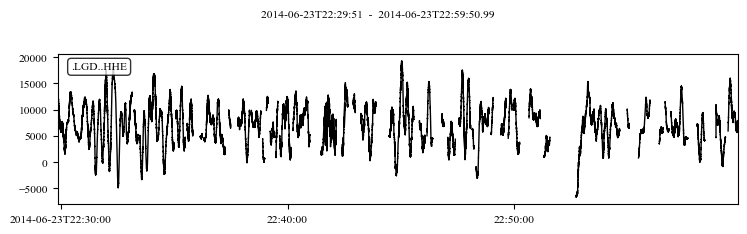

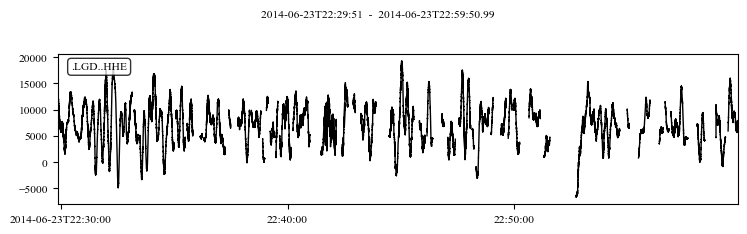

In [54]:
st.plot()

In [55]:
st.merge(fill_value=0)

1 Trace(s) in Stream:
.LGD..HHE | 2014-06-23T22:29:51.000000Z - 2014-06-23T22:59:50.990000Z | 100.0 Hz, 180000 samples

In [56]:
st[0].stats.sac.kevnm = 'TG'

In [57]:
st[0].stats.network = 'TG'

In [58]:
st[0].stats

         network: TG
         station: LGD
        location: 
         channel: HHE
       starttime: 2014-06-23T22:29:51.000000Z
         endtime: 2014-06-23T22:59:50.990000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 180000
           calib: 1.0
         _format: SAC
             sac: AttribDict({'delta': 0.0099999998, 'depmin': -4914.0, 'depmax': 18155.0, 'scale': 1.0, 'b': 0.0, 'e': 197.99001, 'stla': 41.834301, 'stlo': 46.242199, 'stel': 406.0, 'stdp': 0.0, 'user7': 0.0, 'user8': 0.0, 'depmen': 7444.4072, 'cmpaz': 90.0, 'cmpinc': 90.0, 'nzyear': 2014, 'nzjday': 174, 'nzhour': 22, 'nzmin': 29, 'nzsec': 51, 'nzmsec': 0, 'nvhdr': 6, 'norid': 0, 'nevid': 0, 'npts': 19800, 'iftype': 1, 'idep': 6, 'iztype': 10, 'leven': 1, 'lpspol': 0, 'lovrok': 0, 'lcalda': 1, 'kstnm': 'LGD', 'kcmpnm': 'HHE', 'kevnm': 'TG'})

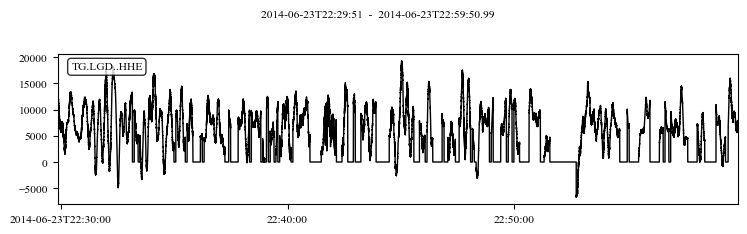

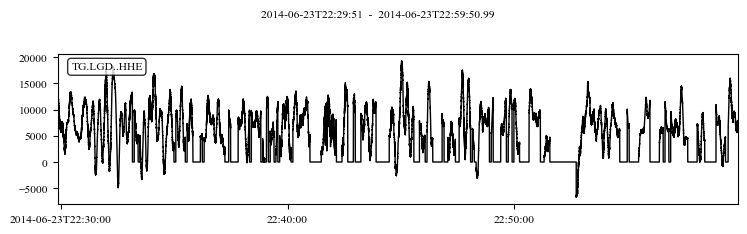

In [59]:
st.plot()

In [60]:
st

1 Trace(s) in Stream:
TG.LGD..HHE | 2014-06-23T22:29:51.000000Z - 2014-06-23T22:59:50.990000Z | 100.0 Hz, 180000 samples

In [61]:
for path in sorted(glob.glob(f'{DATA_DIR}TG/201406232229*/*LGD*.HHE')):
    print(path)
    os.rename(path, f'{path}_')

/Volumes/home/Research/DataBase/00_TG/201406232229/2014174222951.00.LGD.HHE
/Volumes/home/Research/DataBase/00_TG/201406232229/2014174223314.00.LGD.HHE
/Volumes/home/Research/DataBase/00_TG/201406232229/2014174223329.00.LGD.HHE
/Volumes/home/Research/DataBase/00_TG/201406232229/2014174223504.00.LGD.HHE
/Volumes/home/Research/DataBase/00_TG/201406232229/2014174223534.00.LGD.HHE
/Volumes/home/Research/DataBase/00_TG/201406232229/2014174223609.00.LGD.HHE
/Volumes/home/Research/DataBase/00_TG/201406232229/2014174223619.00.LGD.HHE
/Volumes/home/Research/DataBase/00_TG/201406232229/2014174223724.00.LGD.HHE
/Volumes/home/Research/DataBase/00_TG/201406232229/2014174223749.00.LGD.HHE
/Volumes/home/Research/DataBase/00_TG/201406232229/2014174223824.00.LGD.HHE
/Volumes/home/Research/DataBase/00_TG/201406232229/2014174223854.00.LGD.HHE
/Volumes/home/Research/DataBase/00_TG/201406232229/2014174223904.00.LGD.HHE
/Volumes/home/Research/DataBase/00_TG/201406232229/2014174223914.00.LGD.HHE
/Volumes/hom

In [62]:
st.write('/Volumes/home/Research/DataBase/00_TG/201406232229/2014174225930.00.LGD.HHE',format = 'SAC')

In [49]:
st[0].data = st[0].data.filled()

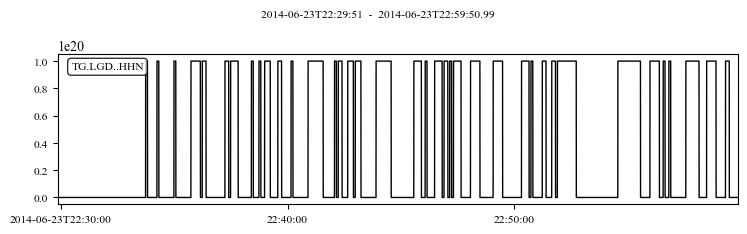

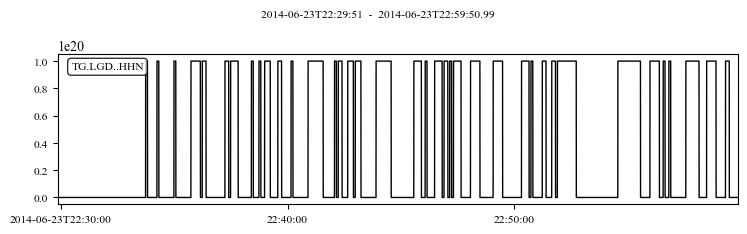

In [51]:
st.plot()